# Content
1. [Why docker compose?](#why-docker-compose)
2. [Ways to make image size smaller](#ways-to-make-image-size-smaller)

# Why docker compose?

The whys:
- Simplified control: multiple containers in one YAML file.

- Efficient collaboration: easily shared.

- Rapid application development: Compose caches the configuration used to create a container

    &rarr; When a service is restarted without change, compose re-uses the existing containers

- Portability across envs: Customize your composition for different envs or users.

- Extensive community and support.

Use cases:
- Dev envs: 
    - The ability to run an application in an isolated environment and interact with it is crucial.
    - Document and configure all of the application's service dependencies.
    - Start with one single command `docker compose up`.
- Auto testing envs:
    - Compose provides a convenient way to create and destroy isolated testing environments.
    
    ```
    docker compose up -d
    ./run_tests
    docker compose down
    ```

Docker compose vs Dockerfile

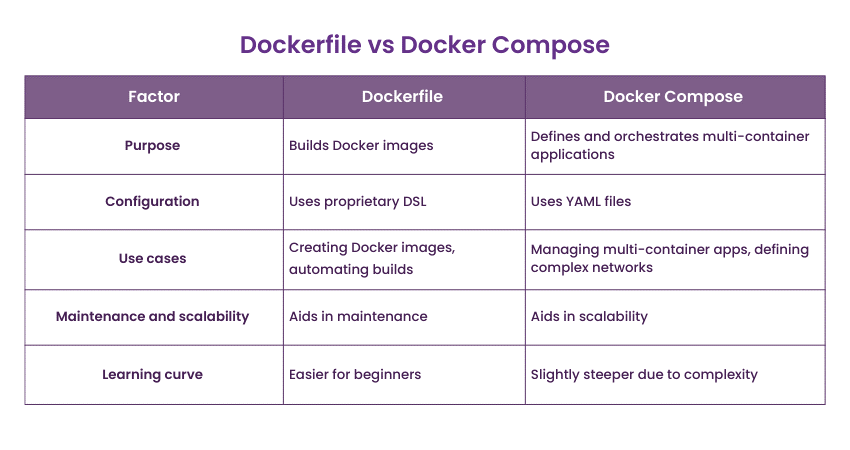

# Ways to make image size smaller

Use smaller base image
- Docker image works in layers.
- Small base layer can result in small image size in the end.
- Rather than `python3`, use `python:3-alpine`

Keep application data elsewhere
- Application data should not be stored in docker image.
- Consider volume feature of container instead.

Use .dockerignore
- Keep what you need in the image.
- Some files are not necessary (i.e .git).

Multi-stage your build
- It's possible to think of the image building into stages: build, test, static analysis, package.
- Common practice is install packages from requirements (stage 1) then only use the packages to develop the app (stage 2).
- Can combine with small image base for each stage.

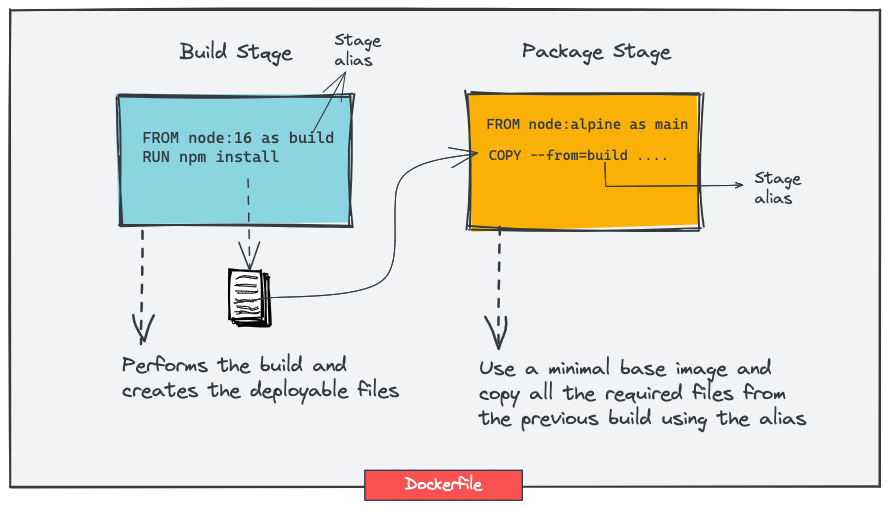

Image 1: 910 MB
```
FROM node:16

COPY . .
RUN npm install
EXPOSE 3000
CMD [ "node", "index.js" ]
```

Image 2: 171 MB
```
FROM node:16 as build

WORKDIR /app
COPY package.json index.js env ./
RUN npm install


FROM node:alpine as main

COPY --from=build /app /
EXPOSE 8080
CMD ["index.js"]
```